# Support Vector Regression (SVR)

## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [48]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [49]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [50]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [51]:
y = y.reshape(len(y),1)

In [52]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [54]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [55]:

# y = y.reshape(len(y))
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\pka_6\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [58]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])

array([[170370.0204065]])

## Visualising the SVR results

In [68]:
scXf=sc_X.inverse_transform(X)
scyf = sc_y.inverse_transform(y)
print(scXf, scyf)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]] [[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [88]:
scXf.shape

(10, 1)

In [93]:
scypred = sc_y.inverse_transform([regressor.predict(X)]).transpose()

In [94]:
scypred.shape

(10, 1)

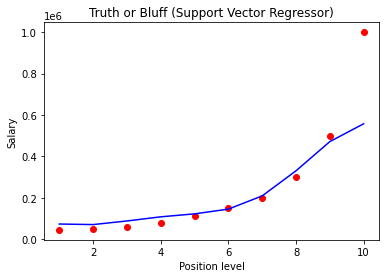

In [96]:

plt.scatter(scXf,scyf, color = 'red')
plt.plot(scXf, scypred, color = 'blue')
plt.title('Truth or Bluff (Support Vector Regressor)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

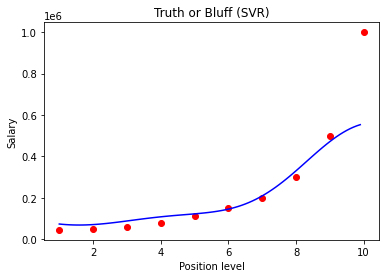

In [98]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform([regressor.predict(sc_X.transform(X_grid))]).transpose(), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()